<a href="https://colab.research.google.com/github/loureenvalyne/Bellabeat-Case-Study-with-R/blob/main/Bellabeat_Case_Study_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bellabeat Capstone Case Study
## Bellabeat is a high-tech manufacturer of health-focused products for women. The company Collects data on activity, sleep, stress and reproductive health which has allowed Bellabeat to empower women with knowledge about their own health and habits.
The objective of the study is to analyze smart device usage data in order to gain insight into how consumers are using smart device and using the information to obtain high-level recommendations to guide Bellabeat marketing strategy to reveal more opportunities for growth.
The Bellabeat product focused on is Time. This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide insights into daily wellness.

# ASK PHASE
**Business task: Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices to help guide marketing strategy for the company.**
### Stakeholders
* Urška Sršen: Bellabeat’s co-founder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s co-founder; key member of the Bellabeat executive team
* Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

# PREPARE PHASE
The data used is the Kaggle data set, **FitBit Business Tracker Data**, provided by Mobius.The data set is in the long format and include 18 csv files. The data is open source as Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.
**Limitations of the data**
The data set has limitations as only two months of the data are made available that is from **03/12/2016-05/12/2016** and the data set accounts for only 30 consumers who consented to the use of their data. Therefore, there may be a sampling bias as there is no data to account for the total population to validate if the sample size is a representative of the population.
The data is not reliable and current as it accounts for only two months in 2016 and some data sets had missing data therefore reducing the integrity of the data.

Since we are using the **Time** product from Bellabeat we would consider four data sets to gather specific information. The finalized specific information would be gathered from the daily activities, daily sleep, daily calories and hourly steps data sets.

*The heartrate data set is not selected because of limited data for it only has entries for 8 users.*

# PROCESS PHASE
Used R because of the large amount data needing analysis and also R is a versatile tool for data analysis because of its extensive analysis capabilities through its rich ecosystem of packages and strong data visualization tools.

In [3]:
##Installing package for analysis;
install.packages("tidyverse")
library(tidyverse)
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Importing dataset and viewing
Importing the dailyActivity_merged, dailyCalories_merged, hourlySteps_merged and sleepDay_merged data sets.

In [4]:
library(readr)
dailyActivity_merged <- read_csv("/kaggle/input/fitabase-data/dailyActivity_merged.csv")
head(dailyActivity_merged)
dailyCalories_merged <- read_csv("/kaggle/input/fitabase-data/dailyCalories_merged.csv")
head(dailyCalories_merged)
dailySteps_merged <- read_csv("/kaggle/input/fitabase-data/dailySteps_merged.csv")
head(dailySteps_merged)
sleepDay_merged <- read_csv("/kaggle/input/fitabase-data/sleepDay_merged.csv")
head(sleepDay_merged)

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 0:00,1,327,346
1503960366,4/13/2016 0:00,2,384,407
1503960366,4/14/2016 0:00,1,412,442
1503960366,4/16/2016 0:00,2,340,367
1503960366,4/17/2016 0:00,1,700,712
1503960366,4/19/2016 0:00,1,304,320


### Cleaning the data

In [5]:
install.packages("here")
library(here)
install.packages("skimr")
library(skimr)
install.packages("janitor")
library(janitor)
library(dplyr)
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

here() starts at /content

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




### Renaming the data sets for easier referencing

In [6]:
daily_activity <- dailyActivity_merged
daily_calories <- dailyCalories_merged
daily_steps <- dailySteps_merged
daily_sleep <- sleepDay_merged

In [7]:
head(daily_activity)
head(daily_calories)
head(daily_steps)
head(daily_sleep)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 0:00,1,327,346
1503960366,4/13/2016 0:00,2,384,407
1503960366,4/14/2016 0:00,1,412,442
1503960366,4/16/2016 0:00,2,340,367
1503960366,4/17/2016 0:00,1,700,712
1503960366,4/19/2016 0:00,1,304,320


### verifying the number of unique user ids to remove duplicates

In [8]:
n_distinct(daily_activity$Id)
n_distinct(daily_calories$Id)
n_distinct(daily_steps$Id)
n_distinct(daily_sleep$Id)

[1] 33

[1] 33

[1] 33

[1] 24

The dailyActivity_merged contain information for 33 users of their daily activity that is daily steps, distance, intensity, calories.
The dailyCalories_merged contain data on daily burned calories for 33 users.
The hourlySteps_merged contain data on hourly steps for 33 users.
The sleepDay_merged contain data on daily total sleep records, total minutes asleep and total time in bed for 24 users.

### Checking for observations in each data frame

In [9]:
nrow(daily_activity)
nrow(daily_calories)
nrow(daily_steps)
nrow(daily_sleep)

[1] 940

[1] 940

[1] 940

[1] 413

The daily_activity, daily_calories, daily_steps data sets have 940 observation whereas the sleep_day data set has 413 observations


### Determine number of duplicates


In [10]:
sum(duplicated(daily_activity))
sum(duplicated(daily_calories))
sum(duplicated(daily_steps))
sum(duplicated(daily_sleep))

[1] 0

[1] 0

[1] 0

[1] 3

### Remove the duplicates


In [11]:
daily_sleep <- daily_sleep %>%
  distinct() %>%
  drop_na()

*to confirm duplicates are removed*


In [12]:
sum(duplicated(daily_sleep))


[1] 0

### Merging the dataset

* changing the column names to be more specific to enable merging of the data into one dataset. We would be using the daily activity and daily  sleep data sets since the calories and daily steps data are acounted for in the daily activity data sets

In [13]:

daily_activity <- rename_with(daily_activity,tolower)
head(daily_activity)

daily_sleep <- rename_with(daily_sleep, tolower)
head(daily_activity)

id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


* The date in the daily_sleep data set is in the as_datetime format whereas the time in the daily_activity data set is in the as_date format. Therefore, we need to change the daily_sleep as_datetime to as_date for the two data sets to have the same date column name and to be merged.

In [14]:
daily_activity <- daily_activity %>%
  rename(date = activitydate) %>%
  mutate(date = as.Date(date, format = "%m/%d/%y"))
head(daily_activity)

daily_sleep <- daily_sleep %>%
  rename(date = sleepday) %>%
  mutate(date = as.Date(date, format = "%m/%d/%y"))
head(daily_sleep)

id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2020-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2020-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2020-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2020-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2020-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2020-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2020-04-12,1,327,346
1503960366,2020-04-13,2,384,407
1503960366,2020-04-14,1,412,442
1503960366,2020-04-16,2,340,367
1503960366,2020-04-17,1,700,712
1503960366,2020-04-19,1,304,320


**Merging**
Since there were more users in the daily activity data set (33), than the sleep data set (24), we use the OUTER JOIN to merge the data sets

In [15]:
Daily_Activity <- merge(daily_activity, daily_sleep, by =  c("id", "date"), all = TRUE)
head(Daily_Activity)

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2020-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2020-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2020-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,1,412,442
4,1503960366,2020-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,NA,NA,NA
5,1503960366,2020-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
6,1503960366,2020-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712


Selecting to get a review of the summary of the data we would be using


In [16]:
Daily_Activity %>%
  select(totalsteps, totaldistance, veryactiveminutes, sedentaryminutes, calories, totalsleeprecords ,totalminutesasleep, totaltimeinbed) %>%
  summary()

   totalsteps    totaldistance    veryactiveminutes sedentaryminutes
 Min.   :    0   Min.   : 0.000   Min.   :  0.00    Min.   :   0.0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:  0.00    1st Qu.: 729.8  
 Median : 7406   Median : 5.245   Median :  4.00    Median :1057.5  
 Mean   : 7638   Mean   : 5.490   Mean   : 21.16    Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.: 32.00    3rd Qu.:1229.5  
 Max.   :36019   Max.   :28.030   Max.   :210.00    Max.   :1440.0  
                                                                    
    calories    totalsleeprecords totalminutesasleep totaltimeinbed 
 Min.   :   0   Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1828   1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.8  
 Median :2134   Median :1.000     Median :432.5      Median :463.0  
 Mean   :2304   Mean   :1.119     Mean   :419.2      Mean   :458.5  
 3rd Qu.:2793   3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :4900   Max.   :3.000     

# ANALYSIS AND SHARING
* Finding how many users are in the merged data set

In [17]:
n_distinct(Daily_Activity$id)

[1] 33

From the merged data set we can analyse visualizations the data to derive any relationship in the observations.
Install the ggplot2 package and library

In [18]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Relationship between total steps and sedentary minutes**

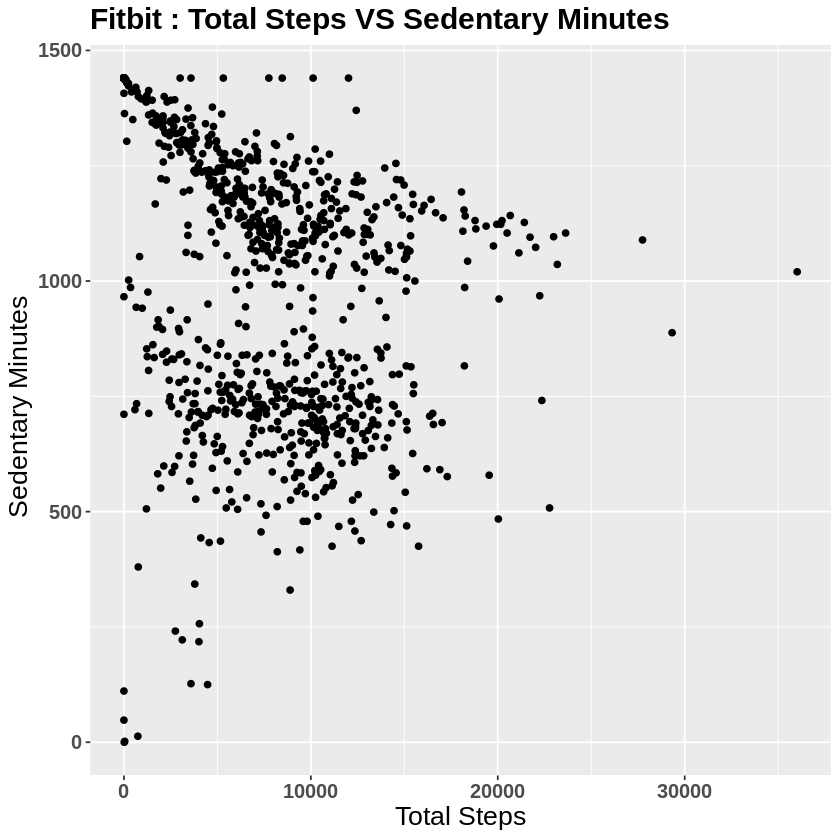

In [19]:
ggplot(Daily_Activity, aes(x=totalsteps, y= sedentaryminutes))+ geom_point()+ labs(title = "Fitbit : Total Steps VS Sedentary Minutes", x="Total Steps", y=" Sedentary Minutes") +
  theme(
      plot.title = element_text(size = 18, face = "bold"),
      axis.title.x = element_text(size = 16),
      axis.title.y = element_text(size = 16),
      axis.text = element_text(size = 12, face="bold")
      )


Generally, the relationship between total steps and sedentary minutes should be linear, in that as steps increase the sedentary minutes reduce which is not the case for these users. As some have less steps and less sedentary minutes whereas others have more steps and more sedentary minutes. The plot shows that for Fitbit users there may be other factors that affect their daily steps and sedentary minutes such as leisure times, working environment and overall physical activity patterns.

**Relationship between total minutes asleep and total time in bed**


Warning message:
“Removed 530 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 530 rows containing missing values or values outside the scale range
(`geom_point()`).”


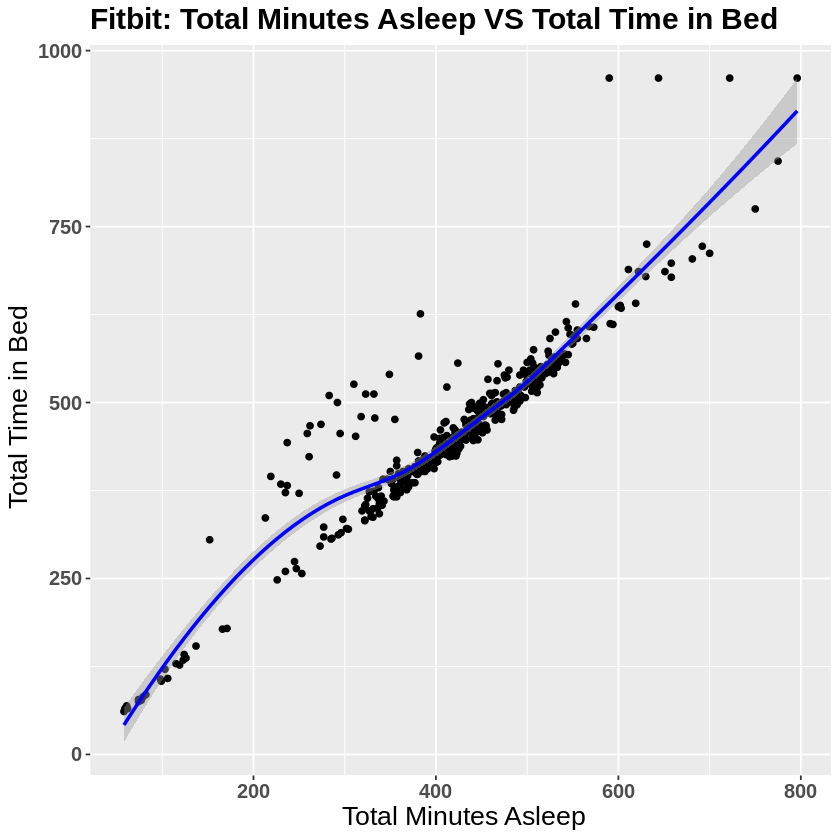

In [20]:
ggplot(Daily_Activity, aes(x=totalminutesasleep, y=totaltimeinbed))+ geom_point()+ geom_smooth(method = "loess", formula= 'y ~ x', color= "blue") +labs(title = "Fitbit: Total Minutes Asleep VS Total Time in Bed", x=" Total Minutes Asleep", y=" Total Time in Bed") +
  theme(
      plot.title = element_text(size = 18, face = "bold"),
      axis.title.x = element_text(size = 16),
      axis.title.y = element_text(size = 16),
      axis.text = element_text(size = 12, face="bold")
      )

From the plot there is an linear relationship between time in bed and total time in bed as we expect.This consistency reinforces the idea that the more time someone spends in bed, the longer their total time in bed will be. Whether it’s for restful sleep or relaxation, understanding this relationship can inform lifestyle choices and sleep habits. Sleep tracking features can be incorporated to provide valuable insights for marketing the smart watch.

**Defining the relationship between total steps and total minutes asleep.We can check to see if the users who sleep more take more steps or fewer steps per day.**

Warning message:
“Removed 530 rows containing missing values or values outside the scale range
(`geom_point()`).”


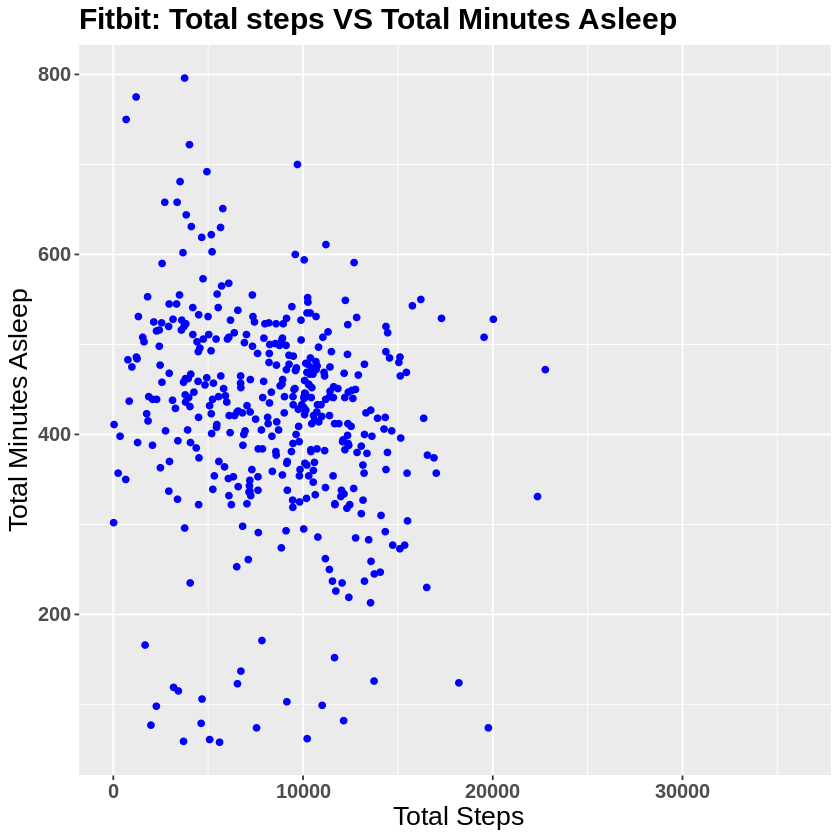

In [21]:
ggplot(Daily_Activity, aes(x= totalsteps, y= totalminutesasleep))+ geom_point(color='blue') + labs(title = "Fitbit: Total steps VS Total Minutes Asleep", x=" Total Steps", y= "Total Minutes Asleep") +
  theme(
      plot.title = element_text(size = 18, face = "bold"),
      axis.title.x = element_text(size = 16),
      axis.title.y = element_text(size = 16),
      axis.text = element_text(size = 12, face="bold")
      )

From the above plot there is no consistent relationship between users' total steps and total minutes asleep. Some who sleep more may lead sedentary lifestyles and those who sleep less may be more active.Inasmuch as this may be the case, we can consider individual variability since the relationship is not linear. That is some users may have different sleep needs and activity levels and some individuals take more steps regardless of their sleep duration. The relationship may vary from person to person due to the differences in stress, exercise, work and also some health conditions like insomnia that affect sleep quality and activity levels.

 **Defining the relationship between total steps and calories.**


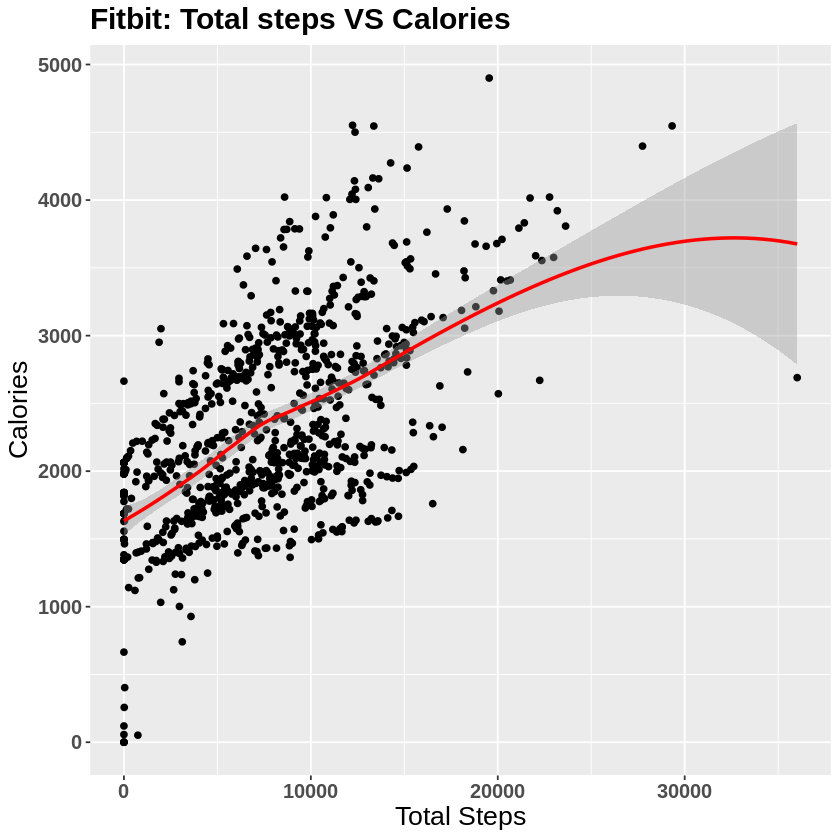

In [22]:
ggplot(Daily_Activity, aes(x= totalsteps, y= calories))+ geom_point()+ geom_smooth(method= "loess", formula='y ~ x', color= "red")+ labs(title = "Fitbit: Total steps VS Calories", x="Total Steps", y="Calories") +
  theme(
      plot.title = element_text(size = 18, face = "bold"),
      axis.title.x = element_text(size = 16),
      axis.title.y = element_text(size = 16),
      axis.text = element_text(size = 12, face="bold")
      )

Based on the above plot users who take more steps burn more calories. There is a linear relationship between total steps and calories burnt. This information can be used to encourage users who take fewer steps to have daily step goals to increase their steps per day.

**Determine the relationship between Very active minutes and the amount of calories burnt**


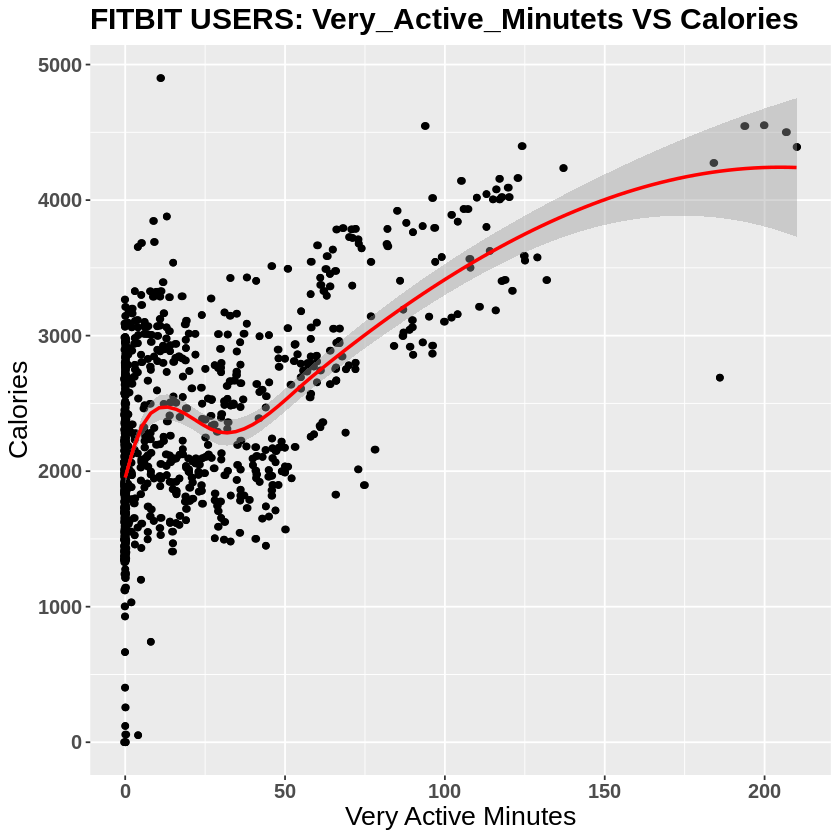

In [23]:
ggplot(Daily_Activity,aes(x=veryactiveminutes ,y= calories)) +
  geom_point() +
  geom_jitter() +
  geom_smooth(method = "loess", formula = 'y ~ x', color="red") +
  labs(title = "FITBIT USERS: Very_Active_Minutets VS Calories", x= "Very Active Minutes", y="Calories") +
  theme(
      plot.title = element_text(size = 18, face = "bold"),
      axis.title.x = element_text(size = 16),
      axis.title.y = element_text(size = 16),
      axis.text = element_text(size = 12, face="bold")
      )

From the above plot,very active minutes is directly proportional to the amount of calories burnt by the users.That is the more the user indulges in activities during the day, the more the calories they burn.This can help in encouraging the users to participate in other activities aside from the walking especially for those with the goal of burning more calories.

**Determining the relationship between total steps and very active minutes**
We can determine if the fitbit users mainly take part in walking in their very active minutes to see if walking is their chosen form of exercise or they take part in other types of exercises during their active minutes

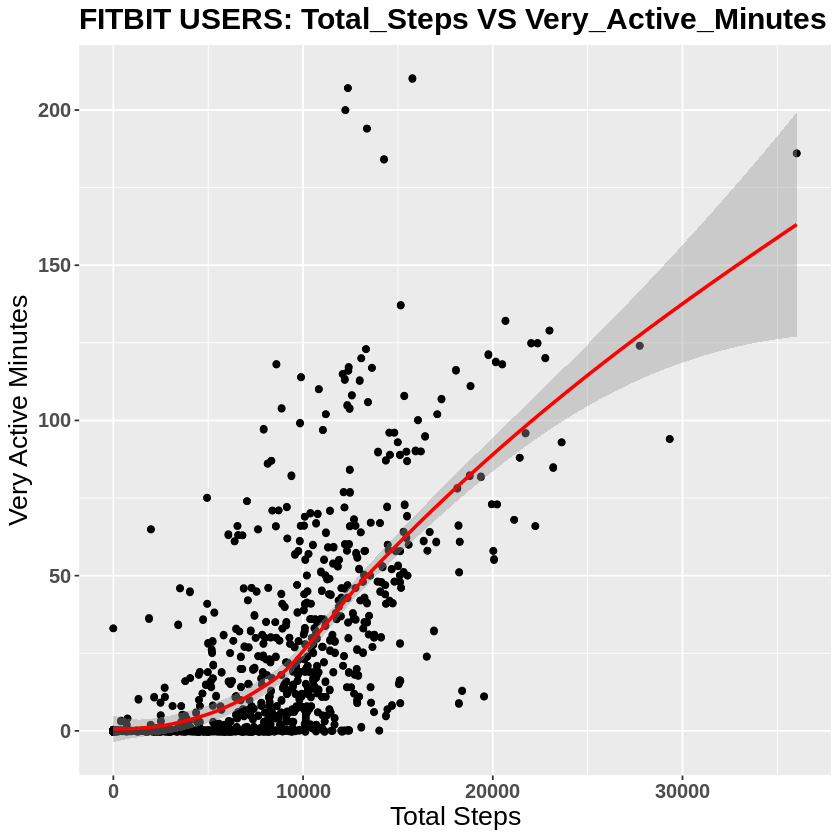

In [24]:
ggplot(Daily_Activity,aes(x=totalsteps ,y=veryactiveminutes)) +
  geom_point() +
  geom_jitter() +
  geom_smooth(method = "loess", formula = 'y ~ x', color="red") +
  labs(title = "FITBIT USERS: Total_Steps VS Very_Active_Minutes", x="Total Steps", y="Very Active Minutes") +
  theme(
      plot.title = element_text(size = 18, face = "bold"),
      axis.title.x = element_text(size = 16),
      axis.title.y = element_text(size = 16),
      axis.text = element_text(size = 12, face="bold")
      )

From the plot, we see that most fitbit users take part in walking as an exercise during their active minutes to maintain their health. It can also be identified that majority of the users take fewer steps in relation to their active minutes. It could be majority of the fitbit users take part in other activities for exercise aside from walking to maintain their health during their active minutes.

According to <https://www.medicinenet.com/how_many_steps_a_day_is_considered_active/article.htm> , Studies using the 10,000 steps per day goal have shown weight loss, improved glucose tolerance, and reduced blood pressure from increased physical activity toward achieving this goal. The following pedometer indices have been developed to provide a guideline on steps and activity levels:

**Sedentary: Less than 5,000 steps daily
Low active: About 5,000 to 7,499 steps daily
Somewhat active: About 7,500 to 9,999 steps daily
Active: More than 10,000 steps daily**

The goal of 10,000 steps is the recommended daily step target for healthy adults to achieve health benefits. Individual needs may vary due to age, fitness level and health conditions*

**Finding the average steps per day**


In [25]:
Daily_average_activity <- Daily_Activity %>%
  group_by(id) %>%
  summarize(mean_daily_calories = mean(calories), mean_daily_steps = mean(totalsteps))
head(Daily_average_activity)

id,mean_daily_calories,mean_daily_steps
<dbl>,<dbl>,<dbl>
1503960366,1816.419,12116.742
1624580081,1483.355,5743.903
1644430081,2811.300,7282.967
1844505072,1573.484,2580.065
1927972279,2172.806,916.129
2022484408,2509.968,11370.645


**Classifying the users by daily steps**

In [26]:
User_type <- Daily_average_activity %>%
  mutate (user_type = case_when(mean_daily_steps < 5000 ~ "Sedentary" , mean_daily_steps >= 5000 & mean_daily_steps <=7499 ~ "Low Active" , mean_daily_steps >= 7500 & mean_daily_steps <= 9999 ~ "Somewhat Active" , mean_daily_steps >= 10000 ~ "Active"))
head(User_type)

id,mean_daily_calories,mean_daily_steps,user_type
<dbl>,<dbl>,<dbl>,<chr>
1503960366,1816.419,12116.742,Active
1624580081,1483.355,5743.903,Low Active
1644430081,2811.300,7282.967,Low Active
1844505072,1573.484,2580.065,Sedentary
1927972279,2172.806,916.129,Sedentary
2022484408,2509.968,11370.645,Active


**Including Plots to know the type of users**


In [27]:
User_type_percentage <- User_type %>%
  group_by(user_type) %>%
  summarize(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(user_type) %>%
  summarize(total_percent = total/totals) %>%
  mutate(labels = scales :: percent (total_percent))

User_type_percentage$user_type <- factor(User_type_percentage$user_type, levels = c("Sedentary", "Low Active", "Somewhat Active", "Active"))
head(User_type_percentage)

user_type,total_percent,labels
<fct>,<dbl>,<chr>
Active,0.2121212,21.2%
Low Active,0.2727273,27.3%
Sedentary,0.2424242,24.2%
Somewhat Active,0.2727273,27.3%


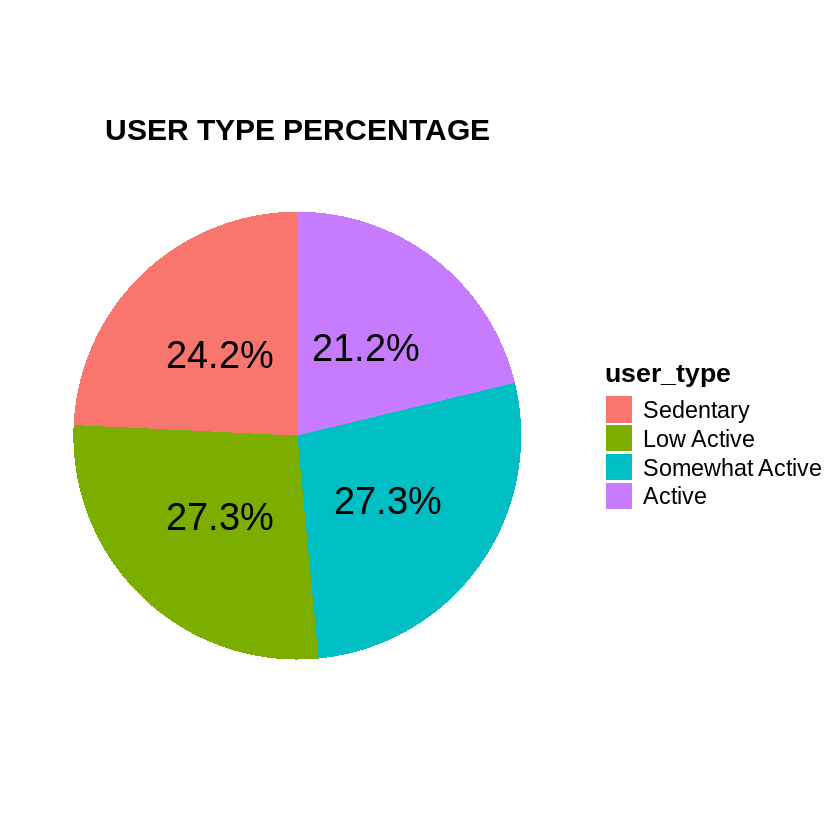

In [28]:
User_type_percentage %>%
  ggplot(aes(x="", y = total_percent, fill = user_type)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start=0) +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(),
        panel.grid = element_blank(),
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust=0.5, size =18, face = "bold"),
        legend.text = element_text(size = 14),
        legend.title = element_text(size = 16, face = "bold")) +
  geom_text(aes(label = labels),position = position_stack(vjust = 0.5), size = 8, color = "black") + labs(title = "USER TYPE PERCENTAGE")

The above pie-chart shows the percentage of the user type. Sedentary, Low Active, Somewhat Active and Active users forming 24.2%, 27.3%, 27.3% and 21.2% respectively.From the pie chart we can conclude that all type of users use the fitbit smart device.

### Determining the sleep trends of the users
Regular physical activity contributes to better overall health and sleep.According to <https://www.sleepfoundation.org/physical-activity> physical activity can lead to better sleep efficiency and reduced anxiety contributing to the overall health of the individual. We can confirm if this is the case for the Fitbit users through checking their sleep trend each day during the week.

In using the sleep data set,We can use the Daily activity merging it with **INNER JOIN** to accommodate all unique users with complete data in the daily activity and daily sleep data sets.

In [29]:
Daily_Activity <- merge(daily_activity, daily_sleep, by =  c("id", "date"))
head(Daily_Activity)

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2020-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2020-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2020-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,1,412,442
4,1503960366,2020-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,2020-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,2020-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


Confirming the number of unique users available in the data set


In [30]:
n_distinct(Daily_Activity$id)


[1] 24

**Determining the sleep trends during each day of the week**

In [31]:
weekday_steps_sleep <- Daily_Activity %>%
  mutate(weekday = weekdays(date))

weekday_steps_sleep$weekday <- ordered(weekday_steps_sleep$weekday, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

weekday_steps_sleep <- weekday_steps_sleep %>%
  group_by(weekday) %>%
  summarize(Daily_Steps = mean(totalsteps), Daily_Sleep =mean(totalminutesasleep))
head(weekday_steps_sleep)

weekday,Daily_Steps,Daily_Sleep
<ord>,<dbl>,<dbl>
Monday,8022.864,434.6818
Tuesday,8218.538,401.4615
Wednesday,7868.179,405.3036
Thursday,9871.123,419.0702
Friday,7297.855,452.7455
Saturday,9273.217,419.5000


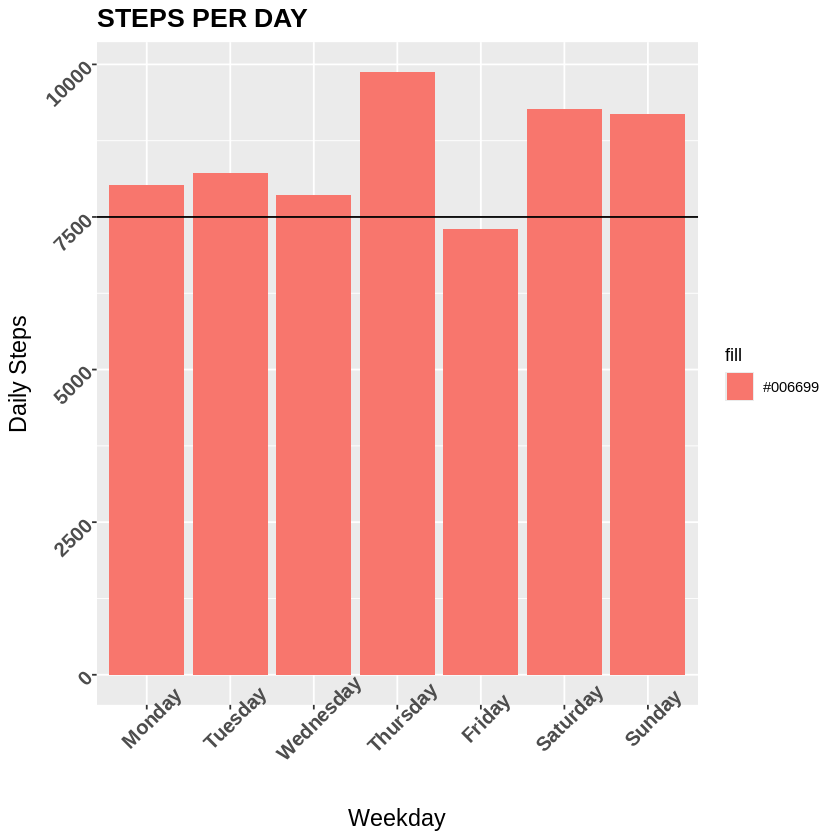

In [32]:
ggplot(weekday_steps_sleep,aes(x=weekday, y=Daily_Steps,fill = '#006699')) +
  geom_col()+
  geom_hline(yintercept = 7500)+
  labs(title = "STEPS PER DAY", x="Weekday", y="Daily Steps") +
  theme(
      plot.title = element_text(size = 16, face = "bold"),
      axis.title.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text = element_text(size = 12, angle = 45, face="bold")
      )

From the bars we can identify that the users walk on average 7500 daily steps apart from Friday where the steps fall a little lower than the other days.There is a huge difference between the steps walked on Thursday and on Friday. This could be Fitbit users take their rest more on Fridays compared to other days of the week.

**The recommended sleep duration is 7 to 8 hours that is 420 to 480 minutes. Determining the amount of sleep each day for the Fitbit users;**


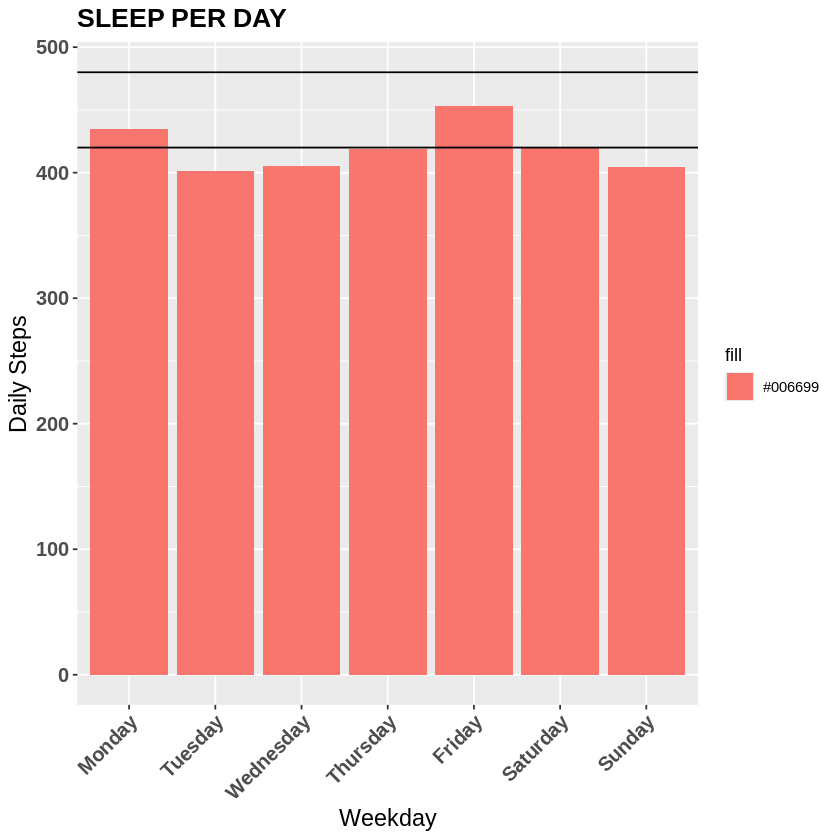

In [33]:
ggplot(weekday_steps_sleep,aes(x=weekday, y=Daily_Sleep,fill = "#006699")) +
  geom_col()+
  geom_hline(yintercept = c(420, 480))+
  labs(title = "SLEEP PER DAY", x="Weekday", y="Daily Steps") +
  theme(
      plot.title = element_text(size = 16, face = "bold"),
      axis.title.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      axis.text = element_text(size = 12, face="bold"),
      axis.text.x = element_text(angle = 45, hjust = 1)
      )

The fitbit users sleep for minutes between 400 and 450 minutes, with Tuesday being the day they sleep for the least amount of minutes and Friday having the most sleeping minutes.Fitbit users sleep the recommended minutes on Monday, Thursday, Friday and Saturday.Therefore, Sleep reminders can be sent to the users particularly of Tuesday, Wednesday and Sunday with benefits of efficient quality sleep sent to the app.
From the two graphs we can conclude that the fitbit users are less active on Fridays than any other day of the week.

## ACT PHASE


Using the above analysis findings, Bellabeat can decide how best to implement changes and take actions.However the above analysis has some limitations. That is, limited set of data which may not be a representation of the population. Less data leads to lower confidence level hence there is a greater possibility that the sample may not accurately reflect the greater population. Therefore Bellabeat can consider using a different data set with more data or their own data to be more precise.

### **Recommendations include**
 **Scheduled activity notifications.**
From our data all type of users use the smart device but not all are active. 21.2%, who made up the minority of the users were active. The somewhat active and low active users each formed 27.3%. The sedentary users formed 24.2% of the population.Reminders can be sent to the users on their daily achieved steps and the recommended daily steps of 8000 to encourage them set daily goals.The reminders can also be sent to the app where the users can read more information on the importance of attaining the goal such as the advantages of leading an active lifestyle for it reduces risks of lifestyle diseases such as obesity and cardiovascular diseases. The app can also recommend other exercise activities such as intensity training, yoga, cardio, running, skipping and cycling to improve on their active hours.The particular exercise can be specific according to the preference of the user.
*For marketing strategy*
*Targeting Inactive Individuals
For individuals who are sedentary who spending long periods sitting, positioning the step tracker as a way to get started in walking more is effective. Marketing messages can emphasize how tracking steps encourages small lifestyle changes, such as taking short walks during breaks or after meals.Encourage behavior such as taking the stairs or walking during phone calls.
*Promoting Active Lifestyles:
For those who are already active, highlight the step tracker as a tool to measure steps they’re already taking. Position it as a way to quantify their physical activity and set goals for maintaining an active lifestyle.


**Scheduled sleep reminders.**
The users sleep for a time below the required 7 hours on Tuesday, Wednesday and Sunday. Alarms can be put that go off on a specific time each day to serve as a reminder for the users. Also on the specific low sleep days a post or article on how of efficient and quality sleep leads to a more productive day can be sent to the app.
*For the marketing strategy*
Segment users into different groups:
Active Sleepers: Users who sleep well and take many steps. Inactive Sleepers: Users who sleep well but have low step counts. Sleep-Deprived Active Users: Users who sleep less but are highly active.
*Tailor marketing messages to each segment:
For active sleepers, emphasize overall health benefits.
For inactive sleepers, highlight the importance of physical activity.
For sleep-deprived active users, position the product as a holistic health solution for both active lifestyles and efficient quality sleep.


**Creating a workout community.**
Based on the geography of the users, they can be grouped to form workout communities who have scheduled times for walking exercises or other form of exercises and also scheduled times where they attend health education classes. The communities would create a sense of belonging and also act a platform for accountability. Consider creating step challenges or virtual walking groups to foster a sense of community. Also encourage users to share achievements and motivate each other.


**Congratulatory messages.**
Based on the calories burnt on a particular day, a congratulatory message can be sent through the app.The users with positive deviations can receive badges for their accomplishments. A goal based on the user's specific BMI can be set and recommendations on healthy diet practices be made available on the app tailored according to the needs of the user.The marketing team can also offer celebratory suggestions when milestones are achieved.


**Health and Wellness Integration.**
*Partner with health and wellness brands or professionals:
Offer joint promotions or discounts. The team can position the product as part of a health strategy.